# Proyecto Final Miguel Aguirre Data Scients
## Proyecto sobre la industria y el modo de trabajo

## Indice:
* Introduccion
* Motivacion
* Definicion
* Objetivo
* Hipotesis
* DataSet
* Usuarios Finales
* Linea Futura
* Eleccion de DataSet
* Sentencias
* Variables
* Graficos
* EDA


## Introduccion

Este proyecto tiene como objetivo realizar un analisis de un data set con el cual podemos realizar graficas y podemos demostrar algunas hipotesis que nos hemos planteado esto para demostrar el buen uso de las herramientas tanto de graficas como de estadistica para la generacion de informacion de calidad


## Motivación
El objetivo de utilizar el siguiente dataSet es para mostrar lo que puede ocasionar el distinto tipo de trabajo con la modalidad que se tiene es decir ver la afectación que se tiene en el momento de generar un tipo de trabajo ya sea remoto hibrido o en sitio el cual podrá permitir ver que oportunidades se pueden generar para los siguientes trabajadores y pensar en que manera se puede ayudar a los que trabajadore actualmente

## Definición

El dataSet sirve para analizar el impacto de los trabajadores de manera mental, problemas de estres y su afectacion dependiendo de las areas de trabajo


## Objetivo
El objetivo de este dataset y su analisis es observar los problemas que puede ocasionar el trabajo remoto asi como la industria en la cual se ven mas reflejados estos problemas de estress y aislamiento social, la preferencia de la industria por un tipo de trabajo y alcanzar un pronostico sobre las industrias si es necesario una reincorporacion a oficinas, una incorporacion pausada de manera que sea mas facil para un trabajador trabajar de manera hibrida o si ha sido un impacto grande la creacion de espacios remotos para los trabajadores y su calidad de vida

## Hipotesis

### Hipotesis 1
¿Se tiene mas estres en trabajos de manera en sitio?

### Hipotesis 2
La edad influye en la eleccion del tipo de trabajo ya sea en oficina o en remoto
### Hipotesis 3
La industria de TI tiene mas acceso a trabajo remoto

### Hipotesis 4
La calificacion de aislamiento social es mayor en el trabajo remoto

### Hipotesis de ML 1
Podemos determinar que enfermedades mentales puede ocasionar cierto tipo de trabajo y su forma de trabajo

### Hipotesis de ML 2
Podemos determinar el nivel de estres que puede generar el trabajo actual dependiendo la edad la industria y el tipo de trabajo

## DataSet

El siguiente dataSet fue extraido de la pagina [Kaggle](https://www.kaggle.com/datasets/iramshahzadi9/remote-work-and-mental-health/data) y contiene los siguientes campos
* Employee_ID: es un identificador unico de cada empleado
* Age: la edad de cada empleado
* Gender: Genero de los empleados
* Job_Role: El puesto actual del empleado
* Industry: La industria en la que trabaja
* Work_Location: El espacio de trabajo que es Remoto En sitio e Hibrido
* Stress_Level: El nivel de estress de cada empleado
* Mental_Health_Condition: Cualquier condicion mental reportada (Ansiedad, Deprecion etc)
* Social_Isolation_Rating: reporte de 1 a 5 que tan aislados se sienten
* Satisfaction_with_Remote_Work: Que tan satisfechos estan con los acuerdos de trabajo remoto(Satisfecho, Neutral, Insatisfecho)
* Company_Support_for_Remote_Work: Soporte de la compañia para el trabajo remoto
* Physical_Activity: Actividad Fisica que tienen
* Sleep_Quality: Calidad de sueño
* Region: Region donde trabajan


In [40]:
import os
from kaggle import KaggleApi

# descarga de dataset mediante api de kaggle
api = KaggleApi()

api.authenticate()
dataset_name = "iramshahzadi9/remote-work-and-mental-health"

carpeta_destino = "./data"
os.makedirs(carpeta_destino, exist_ok=True)
ruta_completa=os.path.join(os.getcwd(), carpeta_destino)
api.dataset_download_files(dataset_name, path=carpeta_destino, unzip=True)


Dataset URL: https://www.kaggle.com/datasets/iramshahzadi9/remote-work-and-mental-health


## Informacion de Dataset


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(carpeta_destino + "/Impact_of_Remote_Work_on_Mental_Health.csv")
df.head(5)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [42]:
print("Cantidad de columnas: ", df.shape)
print("Nombre de columnas: ", df.columns)

Cantidad de columnas:  (5000, 20)
Nombre de columnas:  Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,40.9950,11.296021,22.0,31.0,41.0,51.0,60.0
Years_of_Experience,5000.0,17.8102,10.020412,1.0,9.0,18.0,26.0,35.0
Hours_Worked_Per_Week,5000.0,39.6146,11.860194,20.0,29.0,40.0,50.0,60.0
Number_of_Virtual_Meetings,5000.0,7.5590,4.636121,0.0,4.0,8.0,12.0,15.0
Work_Life_Balance_Rating,5000.0,2.9842,1.410513,1.0,2.0,3.0,4.0,5.0
Social_Isolation_Rating,5000.0,2.9938,1.394615,1.0,2.0,3.0,4.0,5.0
Company_Support_for_Remote_Work,5000.0,3.0078,1.399046,1.0,2.0,3.0,4.0,5.0


## Nivel de Estres y tipo de trabajo

C:\Users\migue\AppData\Local\Temp\ipykernel_8000\3238523188.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, y_pivot['High'][i] + 5, str(int(y_pivot['High'][i])), ha='center', va='bottom')
C:\Users\migue\AppData\Local\Temp\ipykernel_8000\3238523188.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + bar_width, y_pivot['Low'][i] + 5, str(int(y_pivot['Low'][i])), ha='center', va='bottom')
C:\Users\migue\AppData\Local\Temp\ipykernel_8000\3238523188.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as lab

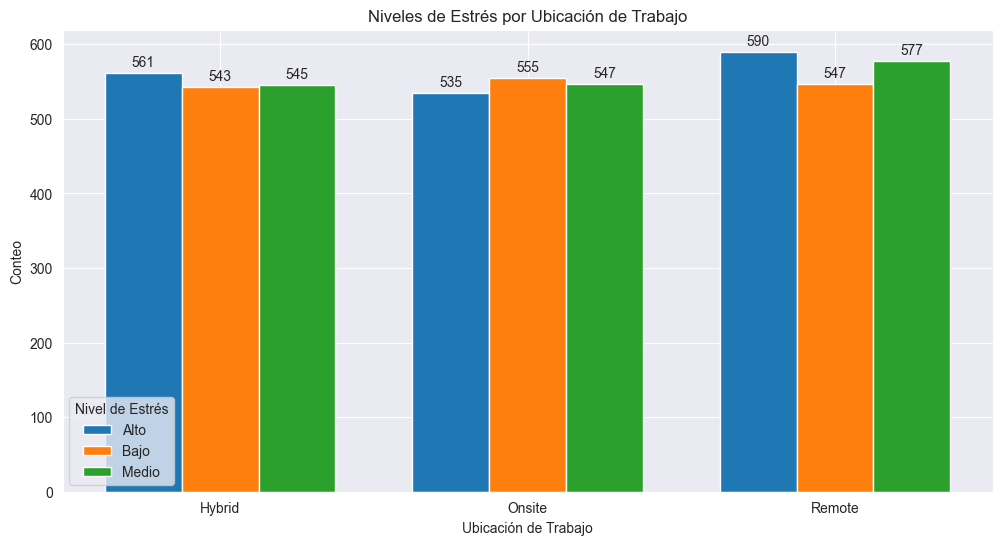

In [45]:
estress_tipotrabajo = df[["Work_Location", "Stress_Level"]]
categorias = estress_tipotrabajo["Work_Location"].unique()
y = estress_tipotrabajo.groupby(["Work_Location", "Stress_Level"]).Stress_Level.count()
y_pivot = y.unstack().fillna(0)

bar_width = 0.25
index = np.arange(len(y_pivot))

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, y_pivot["High"], bar_width, label="Alto")
bar2 = ax.bar(index + bar_width, y_pivot['Low'], bar_width, label='Bajo')
bar3 = ax.bar(index + 2*bar_width, y_pivot['Medium'], bar_width, label='Medio')
for i in range(len(y_pivot)):
    ax.text(i, y_pivot['High'][i] + 5, str(int(y_pivot['High'][i])), ha='center', va='bottom')
    ax.text(i + bar_width, y_pivot['Low'][i] + 5, str(int(y_pivot['Low'][i])), ha='center', va='bottom')
    ax.text(i + 2*bar_width, y_pivot['Medium'][i] + 5, str(int(y_pivot['Medium'][i])), ha='center', va='bottom')

ax.set_xlabel('Ubicación de Trabajo')
ax.set_ylabel('Conteo')
ax.set_title('Niveles de Estrés por Ubicación de Trabajo')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(y_pivot.index)
ax.legend(title='Nivel de Estrés')
plt.show()




### Conclusion de grafico
Podemos observar que la hipotesis 1 que trata sobre el estres con el tipo de trabajo es relevante ver que no se cumple ya que el mayor nivel de estres se encuentra justo en la categoria de trabajo remoto y con la conclusion que el estres no se encuentra en el trabajo en sitio sino en el remoto ademas de que podemos agregar que mayor cantidad de personas encuentran mas bajo el estres en un trabajo remoto

## Grafico de edad y ubicación de trabajo

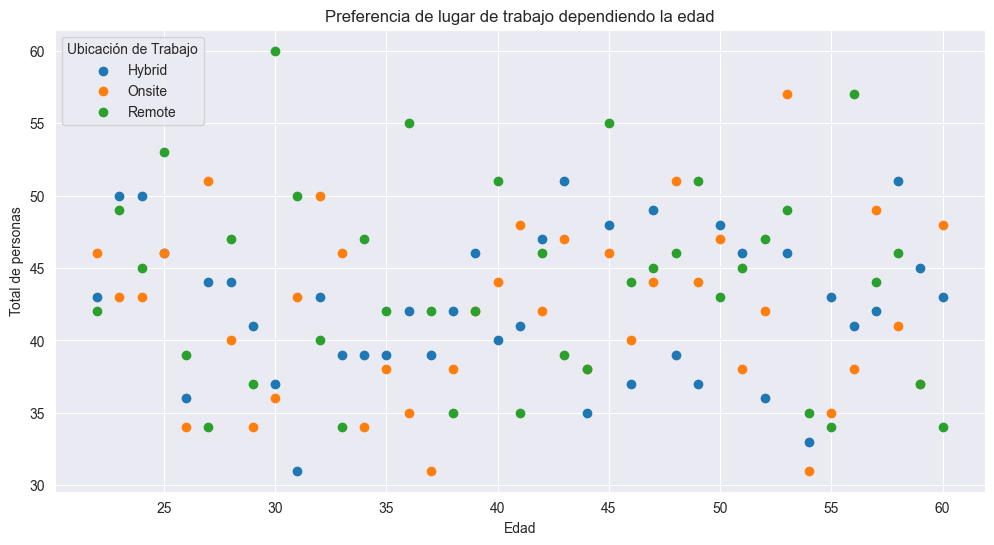

In [46]:
age_job = df[["Age","Work_Location"]]
ages = age_job.Age.unique()

amount_job = age_job.groupby(["Age", "Work_Location"]).Work_Location.count()
amount_job = amount_job.reset_index(name="Count")

plt.figure(figsize=(12, 6))
for location in amount_job["Work_Location"].unique():
    subset = amount_job[amount_job["Work_Location"] == location]
    plt.scatter(subset["Age"], subset["Count"], label=location)

plt.xlabel('Edad')
plt.ylabel('Total de personas')
plt.title('Preferencia de lugar de trabajo dependiendo la edad')
plt.legend(title='Ubicación de Trabajo')



### Conclusion de Grafico 2

En este grafico podemos apreciar la edad de las personas y la cantidad que tienen un trabjo remoto, en sitio e hibrido por lo cual podemos destacar que las personas mayores obtienen mas un empleo en sitio que lo contrario de los jovenes que mantienen un trabajo mas remoto e incluso a una edad de 30 a 35 años prefieren un trabajo remoto que un trabajo en sitio conforme va acercandose mas a la edad grande es conforme van cambiando la modalidad de trabajo

Por otra parte el grafico no nos puede asegurar que la preferencia sea esa ya que la informacion que tenemos es sobre personas que ya tienen sus empleos asi
podemos intuir que asi lo eligieron pero no asegurar que esa fue su preferencia


## Grafica De Industria y lugar de trabajo

C:\Users\migue\AppData\Local\Temp\ipykernel_8000\2733759927.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count_industries_pivot['Hybrid'][i] + 5, str(int(count_industries_pivot['Hybrid'][i])), ha='center', va='bottom')
C:\Users\migue\AppData\Local\Temp\ipykernel_8000\2733759927.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + bar_width, count_industries_pivot['Onsite'][i] + 5, str(int(count_industries_pivot['Onsite'][i])), ha='center', va='bottom')
C:\Users\migue\AppData\Local\Temp\ipykernel_8000\2733759927.py:17: FutureWarning: Series.__getitem__ treating keys as positions is depre

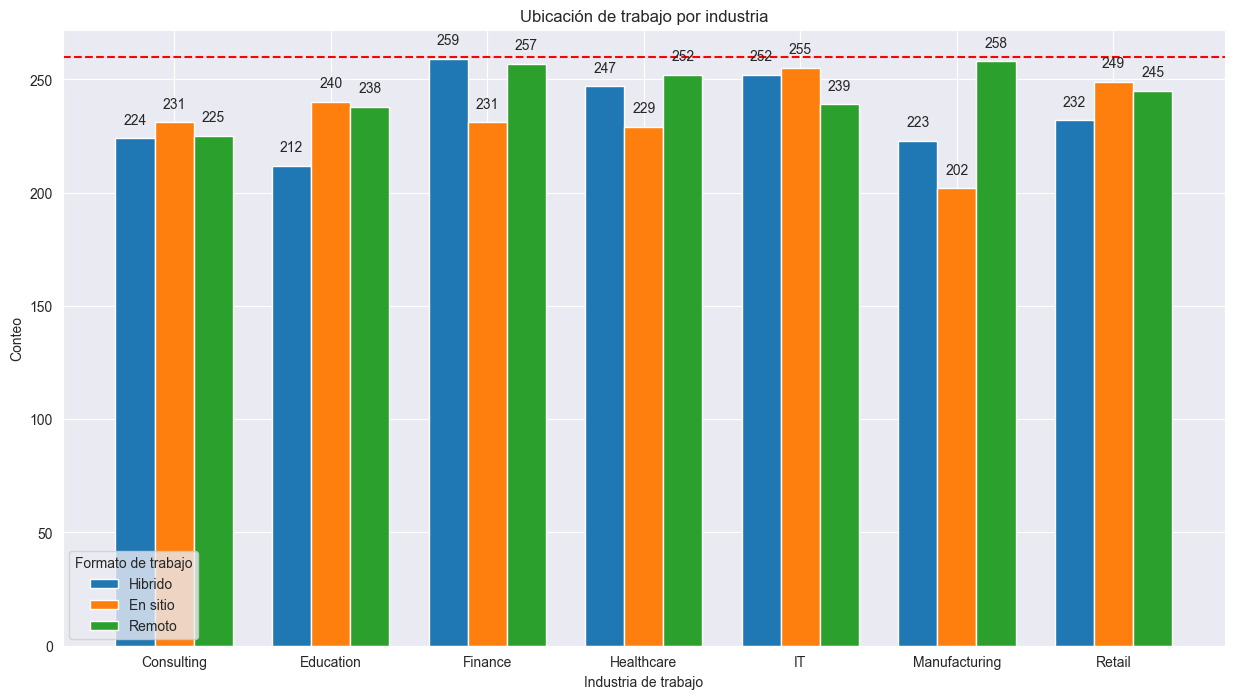

In [47]:
industry_jobs = df[["Industry","Work_Location"]]
industry = industry_jobs.Industry.unique()

count_industries = industry_jobs.groupby(["Industry", "Work_Location"]).Work_Location.count()
count_industries_pivot = count_industries.unstack()
bar_width = 0.25
index = np.arange(len(count_industries_pivot))

fig, ax = plt.subplots(figsize=(15, 8))
bar1 = ax.bar(index, count_industries_pivot["Hybrid"], bar_width, label="Hibrido")
bar2 = ax.bar(index + bar_width, count_industries_pivot['Onsite'], bar_width, label='En sitio')
bar3 = ax.bar(index + 2*bar_width, count_industries_pivot['Remote'], bar_width, label='Remoto')

for i in range(len(count_industries_pivot)):
    ax.text(i, count_industries_pivot['Hybrid'][i] + 5, str(int(count_industries_pivot['Hybrid'][i])), ha='center', va='bottom')
    ax.text(i + bar_width, count_industries_pivot['Onsite'][i] + 5, str(int(count_industries_pivot['Onsite'][i])), ha='center', va='bottom')
    ax.text(i + 2*bar_width, count_industries_pivot['Remote'][i] + 5, str(int(count_industries_pivot['Remote'][i])), ha='center', va='bottom')

ax.set_xlabel('Industria de trabajo')
ax.set_ylabel('Conteo')
ax.set_title('Ubicación de trabajo por industria')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(count_industries_pivot.index)
ax.legend(title='Formato de trabajo')
ax.axhline(y=260, color='r', linestyle='--')
plt.show()




### Conclusion de grafico 3
En este grafico podemos observar que al parecer el trabajo remoto no es mas favorecido en la industria de TI sino que en otras industrias es mas visible aunque en este dataset no podemos demostrar eso ya que la cantidad de personas de cada industria es diferente y no es igual por lo cual entre mas gente haya en una industria mas probabilidad es de que haya un sesgo de informacion por lo tanto este grafico solo demuestra la situacion en la que se encuentran las personas entrevistadas

pero podemos concluir de que la industria con mas trabajo remoto es la Manufacturera seguido por la de finazas y al 5 lugar podemos encontrar la industria de TI de este grupo de personas.

## Variables:

Las variables a utilizar para este analisis son:
* Puesto e industria: x
* Tipo de lugar de trabajo: y

## Limpieza de datos

In [48]:
columnas = df.columns.tolist()
considerar_columns = ["Age", "Work_Location", "Stress_Level", "Mental_Health_Condition"]

considerar = [ col for col in columnas if col in considerar_columns ]



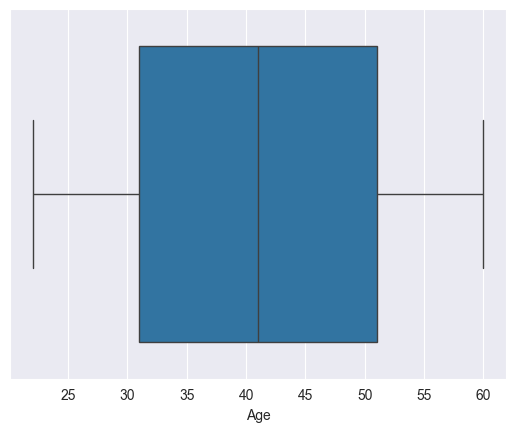

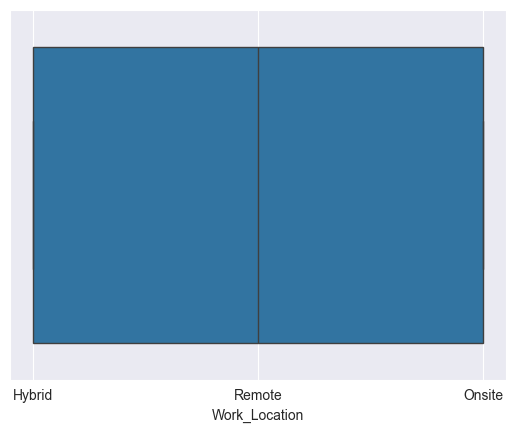

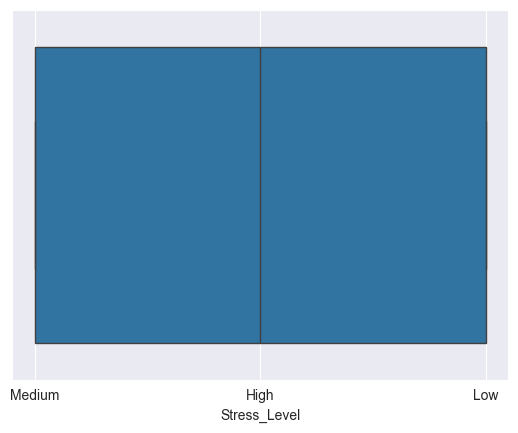

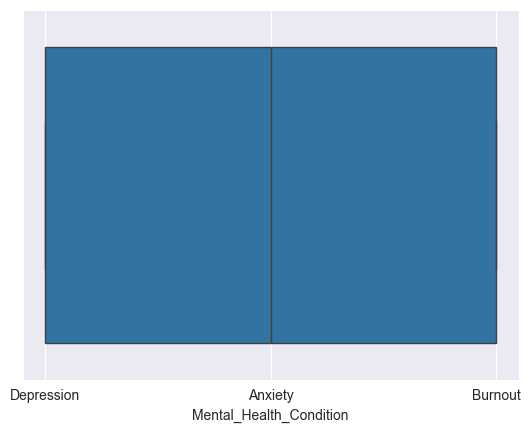

In [49]:
considerardf = df[considerar]
considerardf.dropna()

for col in considerardf.columns.tolist():
    fig = plt.figure()
    sns.boxplot(considerardf, x= col)



Podemos observar que estos gráficos no dan algun indicio de que tenemos informacion fuera de los indices por lo cual no se tiene que hacer algun remplazo o modificacion de la información más alla de llevarlo a datos numericos ya que son datos de tipo categoricos o metadatos

## Correlación

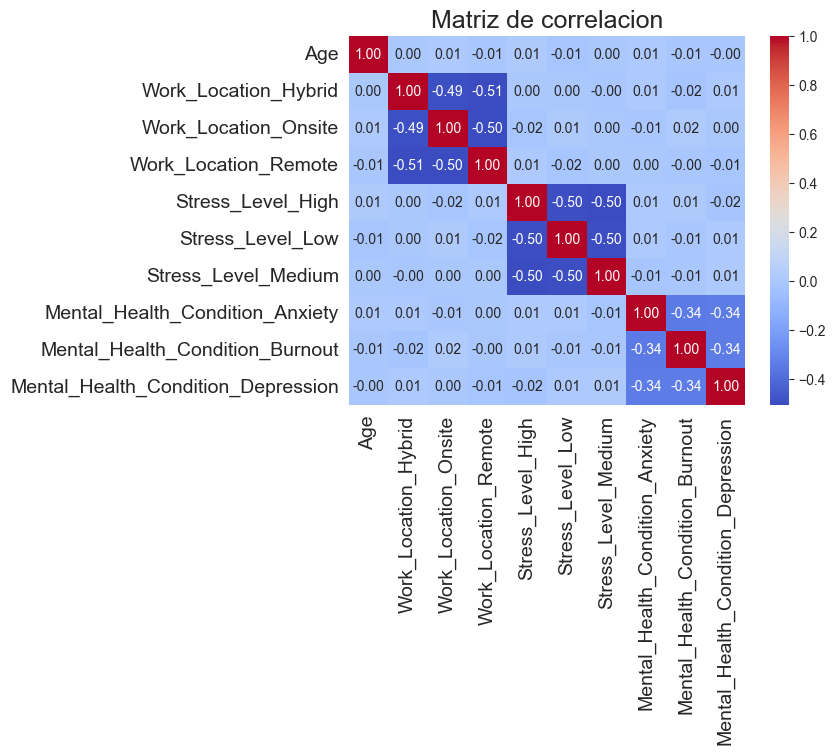

In [50]:
encoded_df = pd.get_dummies(considerardf, columns=['Work_Location', 'Stress_Level', 'Mental_Health_Condition'])

correlation_matrix = encoded_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de correlacion", fontsize=18)
plt.show()



## Modelado
Se utilizaran los siguientes modelos de ML que seran LinearRegression y RandomForest



### Caso 1 Condiciones medicas generadas por el trabajo

#### Lieneal Regretion

In [51]:
X = encoded_df.drop(['Mental_Health_Condition_Anxiety', 'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression'], axis=1)
y_anxiety = encoded_df['Mental_Health_Condition_Anxiety']
y_burnout = encoded_df['Mental_Health_Condition_Burnout']
y_depression = encoded_df['Mental_Health_Condition_Depression']

x_train_anxiety, x_test_anxiety ,y_train_anxiety ,y_test_anxiety = train_test_split(X,y_anxiety, test_size=0.2, random_state=42)
x_train_burnout, x_test_burnout,y_train_burnout,y_test_burnout = train_test_split(X,y_burnout, test_size=0.2, random_state=42)
x_train_depression, x_test_depression,y_train_depression,y_test_depression = train_test_split(X,y_depression, test_size=0.2, random_state=42)

model_anxiety = LinearRegression()
model_anxiety.fit(x_train_anxiety, y_train_anxiety)
model_burnout = LinearRegression()
model_burnout.fit(x_train_burnout, y_train_burnout)
model_depression = LinearRegression()
model_depression.fit(x_train_depression, y_train_depression)


linear_score_anxiety = model_anxiety.score(x_test_anxiety, y_test_anxiety)
linear_score_burnout = model_burnout.score(x_test_burnout, y_test_burnout)
linear_score_depression = model_depression.score(x_test_depression, y_test_depression)

print(f'Linear Regression R^2 Score para ansiedad: {linear_score_anxiety}')
print(f'Linear Regression R^2 Score para burnout: {linear_score_burnout}')
print(f'Linear Regression R^2 Score para deprecion: {linear_score_depression}')




Linear Regression R^2 Score para ansiedad: -0.005962903320722912
Linear Regression R^2 Score para burnout: -0.003143794263309463
Linear Regression R^2 Score para deprecion: -0.002445597862908322


#### Random Forest

In [52]:
param_grid = { 'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }

forest_model_anxiety = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model_anxiety.fit(x_train_anxiety, y_train_anxiety)
forest_model_burnout = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model_burnout.fit(x_train_burnout, y_train_burnout)
forest_model_depression = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model_depression.fit(x_train_depression, y_train_depression)
# Evaluar los modelos de Random Forest
forest_score_anxiety = forest_model_anxiety.score(x_test_anxiety, y_test_anxiety)
forest_score_burnout = forest_model_burnout.score(x_test_burnout, y_test_burnout)
forest_score_depression = forest_model_depression.score(x_test_depression, y_test_depression)
print(f'Random Forest R^2 Score for Anxiety: {forest_score_anxiety}')
print(f'Random Forest R^2 Score for Burnout: {forest_score_burnout}')
print(f'Random Forest R^2 Score for Depression: {forest_score_depression}')

Random Forest R^2 Score for Anxiety: -0.11497089306181629
Random Forest R^2 Score for Burnout: -0.12022188671639511
Random Forest R^2 Score for Depression: -0.1108105792183911


#### Resultado

Podemos observar que la informacion sobre los problemas de salud que puede ocasionar el tipo de trabajo no es relevante en este dataset ya que la mayoria de la informacion sobre las consecuencias del trabajo remoto no son concluyentes a pesar de que contiene muchos datos este dataSet es mas categorico y a pesar de que se hizo la transformacion de la informacion con one-hot-encoding no arrojo informacion suficiente para los modelos de procesamiento de informacion por lo cual no nos puede dar resultados consisos sobre que problemas puede ocasionar a futuro ya que solo contabamos con 3 categorias que se correlacionaban de una manera similar
por lo tanto este caso no se puede concluir de manera correcta

### Caso 2 Estres por industria edad y tipo de trabajo

In [53]:
x = encoded_df.drop(["Stress_Level_High", "Stress_Level_Low", "Stress_Level_Medium"], axis=1)
y = encoded_df[["Stress_Level_High", "Stress_Level_Low", "Stress_Level_Medium"]].idxmax(axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(x_train, y_train)

y_pred = forest_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                     precision    recall  f1-score   support

  Stress_Level_High       0.35      0.36      0.35       335
   Stress_Level_Low       0.33      0.32      0.32       326
Stress_Level_Medium       0.32      0.31      0.32       339

           accuracy                           0.33      1000
          macro avg       0.33      0.33      0.33      1000
       weighted avg       0.33      0.33      0.33      1000

[[120 105 110]
 [105 105 116]
 [121 112 106]]


In [54]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(forest_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


#### Resultados

Podemos observar que el modelo que se uso tiene los suficientes datos para validar la informacion que tiene es decir el nivel de estres por industria y edad nos arrojara un resultado correcto con lo cual nos podra predecir que nivel de estres tendremos si estamos en cierta edad
dado que el dataset no contiene demasiada informacion a un nivel de estres mas que categorico es facil deducir que el resultado puede estar viciado por eso ya que solo hay tres niveles de estres y no hay un numero que nos ayude a verificar que tanto estres es el que realmente hay por lo cual este modelo servira de manera informativa para alertar a los Usuarios en este caso podria ser para Recursos humanos para ver y tomar medidas para el manejo del estres